In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src/features')))

import pandas as pd
import numpy as np
import warnings

from tqdm import tqdm
from datetime import datetime

from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split

from process_features import preprocess_data
from forests import ForestKind, TaskType
from naf_model import NeuralAttentionForest, NAFParams

from IPython.core.debugger import set_trace

warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

path = '../../gsoc_incidents_raw3.parquet'
df = pd.read_parquet(path)

df['target'] = df['Вердикт'].apply( lambda x: True if x == 'False Positive' else (pd.NA if x == 'Не указан' else False))
df = df[df['target'].notnull()]
df['target'] = df['target'].astype(float)
df = df[::10]

y = df['target'].astype(float).to_numpy()
X = df.drop(columns=['target'])

used_columns = pd.read_csv('../src/features/used_columns.csv')

X = X[used_columns['column'].to_numpy()]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train = preprocess_data(X_train, '../data/transform_data_pipeline.pkl')

params = NAFParams(
    kind=ForestKind.RANDOM,
    task=TaskType.CLASSIFICATION,
    mode='end_to_end',
    loss='cross_entropy',
    weights_init_type='general_rule_normal',
    n_epochs=200,
    lr=0.001,
    lam=0.0,
    target_loss_weight=1.0,
    hidden_size=128,
    gpu=True,
    gpu_device = 3,
    n_layers=4,
    forest=dict(
        n_estimators=200,
        min_samples_leaf=10,
        n_jobs=-1,
        max_depth=20,
        min_samples_split = 4,
    ),
    random_state=67890
)
model = NeuralAttentionForest(params)

In [2]:
model.fit(X_train, y_train)

min          = 2
max          = 884
std          = 222.5
median       = 386.0
unique count = 879


Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epoch 1/200 — mean loss: 0.47403


Epochs:   1%|          | 2/200 [00:07<12:42,  3.85s/it]

Epoch 2/200 — mean loss: 0.46981
Epoch 3/200 — mean loss: 0.46463


Epochs:   2%|▏         | 4/200 [00:15<12:14,  3.75s/it]

Epoch 4/200 — mean loss: 0.46407
Epoch 5/200 — mean loss: 0.46240


Epochs:   2%|▎         | 5/200 [00:19<12:25,  3.82s/it]

Epoch 6/200 — mean loss: 0.45955


Epochs:   3%|▎         | 6/200 [00:23<12:52,  3.98s/it]

Epoch 7/200 — mean loss: 0.45976


Epochs:   4%|▎         | 7/200 [00:27<13:15,  4.12s/it]

Epoch 8/200 — mean loss: 0.45702


Epochs:   4%|▍         | 8/200 [00:32<13:31,  4.23s/it]

Epoch 9/200 — mean loss: 0.45704


Epochs:   4%|▍         | 9/200 [00:36<13:34,  4.27s/it]

Epoch 10/200 — mean loss: 0.46105


Epochs:   5%|▌         | 10/200 [00:41<13:38,  4.31s/it]

Epoch 11/200 — mean loss: 0.45665


Epochs:   6%|▌         | 11/200 [00:45<13:58,  4.44s/it]

Epoch 12/200 — mean loss: 0.45168


Epochs:   6%|▌         | 12/200 [00:50<13:53,  4.43s/it]

Epoch 13/200 — mean loss: 0.45424


Epochs:   6%|▋         | 13/200 [00:54<14:02,  4.51s/it]

Epoch 14/200 — mean loss: 0.45710


Epochs:   7%|▋         | 14/200 [00:59<13:36,  4.39s/it]

Epoch 15/200 — mean loss: 0.45370


Epochs:   8%|▊         | 15/200 [01:03<13:41,  4.44s/it]

Epoch 16/200 — mean loss: 0.45424


Epochs:   8%|▊         | 16/200 [01:08<13:39,  4.45s/it]

Epoch 17/200 — mean loss: 0.44951


Epochs:   8%|▊         | 17/200 [01:12<13:42,  4.49s/it]

Epoch 18/200 — mean loss: 0.44867


Epochs:   9%|▉         | 18/200 [01:17<13:44,  4.53s/it]

Epoch 19/200 — mean loss: 0.44916


Epochs:  10%|█         | 20/200 [01:26<13:20,  4.45s/it]

Epoch 20/200 — mean loss: 0.45279
Epoch 21/200 — mean loss: 0.44788


Epochs:  10%|█         | 21/200 [01:30<13:14,  4.44s/it]

Epoch 22/200 — mean loss: 0.44955


Epochs:  12%|█▏        | 23/200 [01:38<12:33,  4.26s/it]

Epoch 23/200 — mean loss: 0.44954


Epochs:  12%|█▏        | 24/200 [01:42<12:15,  4.18s/it]

Epoch 24/200 — mean loss: 0.45044


Epochs:  12%|█▎        | 25/200 [01:47<12:23,  4.25s/it]

Epoch 25/200 — mean loss: 0.45022
Epoch 26/200 — mean loss: 0.44447


Epochs:  14%|█▎        | 27/200 [01:55<12:17,  4.26s/it]

Epoch 27/200 — mean loss: 0.44285
Epoch 28/200 — mean loss: 0.44490


Epochs:  14%|█▍        | 29/200 [02:04<12:05,  4.24s/it]

Epoch 29/200 — mean loss: 0.44414


Epochs:  15%|█▌        | 30/200 [02:08<11:51,  4.18s/it]

Epoch 30/200 — mean loss: 0.44316
Epoch 31/200 — mean loss: 0.44428


Epochs:  16%|█▌        | 31/200 [02:13<12:13,  4.34s/it]

Epoch 32/200 — mean loss: 0.44127


Epochs:  16%|█▌        | 32/200 [02:17<12:16,  4.38s/it]

Epoch 33/200 — mean loss: 0.44256


Epochs:  16%|█▋        | 33/200 [02:21<12:17,  4.41s/it]

Epoch 34/200 — mean loss: 0.43827


Epochs:  18%|█▊        | 35/200 [02:30<11:56,  4.34s/it]

Epoch 35/200 — mean loss: 0.44227


Epochs:  18%|█▊        | 36/200 [02:34<11:54,  4.36s/it]

Epoch 36/200 — mean loss: 0.44509
Epoch 37/200 — mean loss: 0.43939


Epochs:  19%|█▉        | 38/200 [02:43<11:33,  4.28s/it]

Epoch 38/200 — mean loss: 0.44205


Epochs:  20%|█▉        | 39/200 [02:48<11:44,  4.37s/it]

Epoch 39/200 — mean loss: 0.44264
Epoch 40/200 — mean loss: 0.43926


Epochs:  20%|██        | 40/200 [02:52<11:36,  4.36s/it]

Epoch 41/200 — mean loss: 0.44085


Epochs:  20%|██        | 41/200 [02:56<11:25,  4.31s/it]

Epoch 42/200 — mean loss: 0.44043


Epochs:  21%|██        | 42/200 [03:01<11:33,  4.39s/it]

Epoch 43/200 — mean loss: 0.43999


Epochs:  22%|██▏       | 44/200 [03:09<11:03,  4.25s/it]

Epoch 44/200 — mean loss: 0.44052


Epochs:  22%|██▎       | 45/200 [03:13<10:47,  4.18s/it]

Epoch 45/200 — mean loss: 0.44471
Epoch 46/200 — mean loss: 0.44134


Epochs:  23%|██▎       | 46/200 [03:17<10:55,  4.26s/it]

Epoch 47/200 — mean loss: 0.43963


Epochs:  24%|██▍       | 48/200 [03:26<10:52,  4.29s/it]

Epoch 48/200 — mean loss: 0.43776
Epoch 49/200 — mean loss: 0.44103


Epochs:  25%|██▌       | 50/200 [03:34<10:31,  4.21s/it]

Epoch 50/200 — mean loss: 0.44175


Epochs:  26%|██▌       | 51/200 [03:39<10:37,  4.28s/it]

Epoch 51/200 — mean loss: 0.43987
Epoch 52/200 — mean loss: 0.43728


Epochs:  26%|██▌       | 52/200 [03:43<10:34,  4.29s/it]

Epoch 53/200 — mean loss: 0.43795


Epochs:  26%|██▋       | 53/200 [03:47<10:19,  4.22s/it]

Epoch 54/200 — mean loss: 0.43566


Epochs:  28%|██▊       | 55/200 [03:55<09:49,  4.07s/it]

Epoch 55/200 — mean loss: 0.43235


Epochs:  28%|██▊       | 56/200 [03:59<09:59,  4.16s/it]

Epoch 56/200 — mean loss: 0.43795
Epoch 57/200 — mean loss: 0.43644


Epochs:  29%|██▉       | 58/200 [04:08<09:48,  4.14s/it]

Epoch 58/200 — mean loss: 0.43541


Epochs:  30%|██▉       | 59/200 [04:11<09:27,  4.03s/it]

Epoch 59/200 — mean loss: 0.43165


Epochs:  30%|███       | 60/200 [04:15<09:16,  3.97s/it]

Epoch 60/200 — mean loss: 0.43312
Epoch 61/200 — mean loss: 0.43277


Epochs:  31%|███       | 62/200 [04:23<09:14,  4.02s/it]

Epoch 62/200 — mean loss: 0.43155
Epoch 63/200 — mean loss: 0.43459


Epochs:  32%|███▏      | 63/200 [04:28<09:28,  4.15s/it]

Epoch 64/200 — mean loss: 0.42914


Epochs:  32%|███▏      | 64/200 [04:32<09:28,  4.18s/it]

Epoch 65/200 — mean loss: 0.43088


Epochs:  32%|███▎      | 65/200 [04:36<09:21,  4.16s/it]

Epoch 66/200 — mean loss: 0.43592


Epochs:  33%|███▎      | 66/200 [04:41<09:37,  4.31s/it]

Epoch 67/200 — mean loss: 0.43386


Epochs:  34%|███▎      | 67/200 [04:45<09:49,  4.43s/it]

Epoch 68/200 — mean loss: 0.43308


Epochs:  34%|███▍      | 68/200 [04:50<09:55,  4.51s/it]

Epoch 69/200 — mean loss: 0.43668


Epochs:  34%|███▍      | 69/200 [04:55<09:49,  4.50s/it]

Epoch 70/200 — mean loss: 0.43482


Epochs:  35%|███▌      | 70/200 [04:59<09:41,  4.47s/it]

Epoch 71/200 — mean loss: 0.43341


Epochs:  36%|███▌      | 71/200 [05:03<09:23,  4.37s/it]

Epoch 72/200 — mean loss: 0.43340


Epochs:  36%|███▌      | 72/200 [05:08<09:18,  4.36s/it]

Epoch 73/200 — mean loss: 0.43062


Epochs:  36%|███▋      | 73/200 [05:12<09:17,  4.39s/it]

Epoch 74/200 — mean loss: 0.43240


Epochs:  37%|███▋      | 74/200 [05:17<09:26,  4.50s/it]

Epoch 75/200 — mean loss: 0.43320


Epochs:  38%|███▊      | 75/200 [05:21<09:21,  4.49s/it]

Epoch 76/200 — mean loss: 0.43326


Epochs:  38%|███▊      | 76/200 [05:26<09:16,  4.48s/it]

Epoch 77/200 — mean loss: 0.43094


Epochs:  39%|███▉      | 78/200 [05:35<09:03,  4.46s/it]

Epoch 78/200 — mean loss: 0.43159
Epoch 79/200 — mean loss: 0.43237


Epochs:  40%|███▉      | 79/200 [05:39<09:03,  4.49s/it]

Epoch 80/200 — mean loss: 0.43000


Epochs:  40%|████      | 80/200 [05:43<08:47,  4.40s/it]

Epoch 81/200 — mean loss: 0.43038


Epochs:  41%|████      | 82/200 [05:52<08:49,  4.49s/it]

Epoch 82/200 — mean loss: 0.43121
Epoch 83/200 — mean loss: 0.43303


Epochs:  42%|████▏     | 83/200 [05:57<08:51,  4.54s/it]

Epoch 84/200 — mean loss: 0.43200


Epochs:  42%|████▎     | 85/200 [06:06<08:43,  4.55s/it]

Epoch 85/200 — mean loss: 0.43301
Epoch 86/200 — mean loss: 0.43593


Epochs:  43%|████▎     | 86/200 [06:11<08:37,  4.54s/it]

Epoch 87/200 — mean loss: 0.42894


Epochs:  44%|████▎     | 87/200 [06:15<08:28,  4.50s/it]

Epoch 88/200 — mean loss: 0.43212


Epochs:  44%|████▍     | 88/200 [06:20<08:25,  4.51s/it]

Epoch 89/200 — mean loss: 0.43082


Epochs:  45%|████▌     | 90/200 [06:28<07:54,  4.31s/it]

Epoch 90/200 — mean loss: 0.43104
Epoch 91/200 — mean loss: 0.42935


Epochs:  46%|████▌     | 91/200 [06:32<07:43,  4.26s/it]

Epoch 92/200 — mean loss: 0.43045


Epochs:  46%|████▌     | 92/200 [06:37<07:47,  4.33s/it]

Epoch 93/200 — mean loss: 0.43179


Epochs:  46%|████▋     | 93/200 [06:41<07:40,  4.31s/it]

Epoch 94/200 — mean loss: 0.42992


Epochs:  47%|████▋     | 94/200 [06:45<07:46,  4.40s/it]

Epoch 95/200 — mean loss: 0.42628


Epochs:  48%|████▊     | 95/200 [06:50<07:41,  4.39s/it]

Epoch 96/200 — mean loss: 0.42719


Epochs:  48%|████▊     | 96/200 [06:54<07:40,  4.42s/it]

Epoch 97/200 — mean loss: 0.42287


Epochs:  48%|████▊     | 97/200 [06:58<07:27,  4.34s/it]

Epoch 98/200 — mean loss: 0.42713


Epochs:  49%|████▉     | 98/200 [07:03<07:26,  4.38s/it]

Epoch 99/200 — mean loss: 0.42481


Epochs:  50%|████▉     | 99/200 [07:07<07:24,  4.40s/it]

Epoch 100/200 — mean loss: 0.42881


Epochs:  50%|█████     | 100/200 [07:12<07:29,  4.49s/it]

Epoch 101/200 — mean loss: 0.42590


Epochs:  50%|█████     | 101/200 [07:17<07:28,  4.53s/it]

Epoch 102/200 — mean loss: 0.42630


Epochs:  51%|█████     | 102/200 [07:21<07:25,  4.54s/it]

Epoch 103/200 — mean loss: 0.42639


Epochs:  52%|█████▏    | 103/200 [07:26<07:24,  4.58s/it]

Epoch 104/200 — mean loss: 0.42425


Epochs:  52%|█████▏    | 104/200 [07:30<07:14,  4.52s/it]

Epoch 105/200 — mean loss: 0.42465


Epochs:  53%|█████▎    | 106/200 [07:39<06:56,  4.43s/it]

Epoch 106/200 — mean loss: 0.42636
Epoch 107/200 — mean loss: 0.43156


Epochs:  54%|█████▎    | 107/200 [07:44<06:53,  4.45s/it]

Epoch 108/200 — mean loss: 0.42634


Epochs:  54%|█████▍    | 108/200 [07:48<06:46,  4.42s/it]

Epoch 109/200 — mean loss: 0.42113


Epochs:  55%|█████▍    | 109/200 [07:52<06:44,  4.44s/it]

Epoch 110/200 — mean loss: 0.41896


Epochs:  55%|█████▌    | 110/200 [07:57<06:41,  4.46s/it]

Epoch 111/200 — mean loss: 0.41966


Epochs:  56%|█████▌    | 111/200 [08:01<06:33,  4.42s/it]

Epoch 112/200 — mean loss: 0.42049


Epochs:  56%|█████▋    | 113/200 [08:10<06:20,  4.37s/it]

Epoch 113/200 — mean loss: 0.42212


Epochs:  57%|█████▋    | 114/200 [08:14<06:10,  4.31s/it]

Epoch 114/200 — mean loss: 0.41813
Epoch 115/200 — mean loss: 0.41865


Epochs:  58%|█████▊    | 116/200 [08:23<06:03,  4.33s/it]

Epoch 116/200 — mean loss: 0.42016


Epochs:  58%|█████▊    | 117/200 [08:27<06:00,  4.34s/it]

Epoch 117/200 — mean loss: 0.41990
Epoch 118/200 — mean loss: 0.41787


Epochs:  59%|█████▉    | 118/200 [08:32<06:03,  4.43s/it]

Epoch 119/200 — mean loss: 0.41896


Epochs:  60%|██████    | 120/200 [08:41<05:52,  4.41s/it]

Epoch 120/200 — mean loss: 0.41785
Epoch 121/200 — mean loss: 0.41617


Epochs:  60%|██████    | 121/200 [08:45<05:47,  4.40s/it]

Epoch 122/200 — mean loss: 0.41334


Epochs:  61%|██████    | 122/200 [08:49<05:36,  4.31s/it]

Epoch 123/200 — mean loss: 0.42108


Epochs:  62%|██████▏   | 124/200 [08:58<05:32,  4.38s/it]

Epoch 124/200 — mean loss: 0.41361


Epochs:  62%|██████▎   | 125/200 [09:02<05:26,  4.36s/it]

Epoch 125/200 — mean loss: 0.41542


Epochs:  63%|██████▎   | 126/200 [09:07<05:25,  4.40s/it]

Epoch 126/200 — mean loss: 0.41958
Epoch 127/200 — mean loss: 0.41825


Epochs:  64%|██████▍   | 128/200 [09:15<05:07,  4.27s/it]

Epoch 128/200 — mean loss: 0.41765


Epochs:  64%|██████▍   | 129/200 [09:19<04:57,  4.19s/it]

Epoch 129/200 — mean loss: 0.41350


Epochs:  65%|██████▌   | 130/200 [09:23<04:55,  4.22s/it]

Epoch 130/200 — mean loss: 0.41589
Epoch 131/200 — mean loss: 0.41137


Epochs:  66%|██████▌   | 132/200 [09:32<04:46,  4.21s/it]

Epoch 132/200 — mean loss: 0.41249
Epoch 133/200 — mean loss: 0.41283


Epochs:  67%|██████▋   | 134/200 [09:40<04:29,  4.08s/it]

Epoch 134/200 — mean loss: 0.41208


Epochs:  68%|██████▊   | 135/200 [09:44<04:32,  4.19s/it]

Epoch 135/200 — mean loss: 0.41307
Epoch 136/200 — mean loss: 0.41669


Epochs:  68%|██████▊   | 136/200 [09:49<04:31,  4.24s/it]

Epoch 137/200 — mean loss: 0.41453


Epochs:  68%|██████▊   | 137/200 [09:53<04:31,  4.30s/it]

Epoch 138/200 — mean loss: 0.41197


Epochs:  70%|██████▉   | 139/200 [10:02<04:27,  4.39s/it]

Epoch 139/200 — mean loss: 0.41085
Epoch 140/200 — mean loss: 0.41605


Epochs:  70%|███████   | 140/200 [10:07<04:26,  4.45s/it]

Epoch 141/200 — mean loss: 0.41101


Epochs:  70%|███████   | 141/200 [10:11<04:25,  4.50s/it]

Epoch 142/200 — mean loss: 0.41273


Epochs:  72%|███████▏  | 143/200 [10:20<04:09,  4.38s/it]

Epoch 143/200 — mean loss: 0.40670
Epoch 144/200 — mean loss: 0.40794


Epochs:  72%|███████▏  | 144/200 [10:24<04:05,  4.38s/it]

Epoch 145/200 — mean loss: 0.41052


Epochs:  72%|███████▎  | 145/200 [10:29<04:01,  4.39s/it]

Epoch 146/200 — mean loss: 0.40882


Epochs:  74%|███████▎  | 147/200 [10:37<03:49,  4.34s/it]

Epoch 147/200 — mean loss: 0.40929
Epoch 148/200 — mean loss: 0.40847


Epochs:  74%|███████▍  | 148/200 [10:42<03:48,  4.40s/it]

Epoch 149/200 — mean loss: 0.40843


Epochs:  75%|███████▌  | 150/200 [10:50<03:33,  4.27s/it]

Epoch 150/200 — mean loss: 0.40789


Epochs:  76%|███████▌  | 151/200 [10:54<03:20,  4.10s/it]

Epoch 151/200 — mean loss: 0.40538


Epochs:  76%|███████▌  | 152/200 [10:58<03:14,  4.05s/it]

Epoch 152/200 — mean loss: 0.40827


Epochs:  76%|███████▋  | 153/200 [11:02<03:15,  4.15s/it]

Epoch 153/200 — mean loss: 0.41704
Epoch 154/200 — mean loss: 0.40897


Epochs:  78%|███████▊  | 155/200 [11:11<03:08,  4.19s/it]

Epoch 155/200 — mean loss: 0.40789


Epochs:  78%|███████▊  | 156/200 [11:15<03:03,  4.18s/it]

Epoch 156/200 — mean loss: 0.40812
Epoch 157/200 — mean loss: 0.40726


Epochs:  78%|███████▊  | 157/200 [11:19<03:03,  4.28s/it]

Epoch 158/200 — mean loss: 0.40488


Epochs:  79%|███████▉  | 158/200 [11:23<02:58,  4.25s/it]

Epoch 159/200 — mean loss: 0.40567


Epochs:  80%|███████▉  | 159/200 [11:28<02:54,  4.26s/it]

Epoch 160/200 — mean loss: 0.40285


Epochs:  80%|████████  | 160/200 [11:32<02:56,  4.40s/it]

Epoch 161/200 — mean loss: 0.40920


Epochs:  80%|████████  | 161/200 [11:37<02:51,  4.41s/it]

Epoch 162/200 — mean loss: 0.40864


Epochs:  81%|████████  | 162/200 [11:41<02:47,  4.41s/it]

Epoch 163/200 — mean loss: 0.40474


Epochs:  82%|████████▏ | 163/200 [11:45<02:40,  4.33s/it]

Epoch 164/200 — mean loss: 0.40277


Epochs:  82%|████████▏ | 164/200 [11:50<02:38,  4.41s/it]

Epoch 165/200 — mean loss: 0.40298


Epochs:  83%|████████▎ | 166/200 [11:59<02:26,  4.31s/it]

Epoch 166/200 — mean loss: 0.40192


Epochs:  84%|████████▎ | 167/200 [12:02<02:16,  4.13s/it]

Epoch 167/200 — mean loss: 0.40165
Epoch 168/200 — mean loss: 0.40200


Epochs:  84%|████████▍ | 168/200 [12:07<02:13,  4.18s/it]

Epoch 169/200 — mean loss: 0.40197


Epochs:  84%|████████▍ | 169/200 [12:11<02:10,  4.22s/it]

Epoch 170/200 — mean loss: 0.40177


Epochs:  85%|████████▌ | 170/200 [12:15<02:08,  4.28s/it]

Epoch 171/200 — mean loss: 0.39973


Epochs:  86%|████████▌ | 171/200 [12:20<02:06,  4.35s/it]

Epoch 172/200 — mean loss: 0.40197


Epochs:  86%|████████▋ | 173/200 [12:29<01:59,  4.43s/it]

Epoch 173/200 — mean loss: 0.40373
Epoch 174/200 — mean loss: 0.40186


Epochs:  88%|████████▊ | 175/200 [12:38<01:50,  4.43s/it]

Epoch 175/200 — mean loss: 0.40464


Epochs:  88%|████████▊ | 176/200 [12:42<01:46,  4.44s/it]

Epoch 176/200 — mean loss: 0.40042
Epoch 177/200 — mean loss: 0.40134


Epochs:  89%|████████▉ | 178/200 [12:51<01:35,  4.35s/it]

Epoch 178/200 — mean loss: 0.40043
Epoch 179/200 — mean loss: 0.39608


Epochs:  90%|████████▉ | 179/200 [12:55<01:32,  4.41s/it]

Epoch 180/200 — mean loss: 0.40119


Epochs:  90%|█████████ | 181/200 [13:04<01:22,  4.36s/it]

Epoch 181/200 — mean loss: 0.40129
Epoch 182/200 — mean loss: 0.39789


Epochs:  92%|█████████▏| 183/200 [13:13<01:13,  4.35s/it]

Epoch 183/200 — mean loss: 0.39872


Epochs:  92%|█████████▏| 184/200 [13:17<01:08,  4.29s/it]

Epoch 184/200 — mean loss: 0.39930
Epoch 185/200 — mean loss: 0.39792


Epochs:  92%|█████████▎| 185/200 [13:21<01:05,  4.39s/it]

Epoch 186/200 — mean loss: 0.39642


Epochs:  93%|█████████▎| 186/200 [13:26<01:00,  4.33s/it]

Epoch 187/200 — mean loss: 0.39620


Epochs:  94%|█████████▎| 187/200 [13:30<00:56,  4.33s/it]

Epoch 188/200 — mean loss: 0.39704


Epochs:  94%|█████████▍| 188/200 [13:34<00:50,  4.21s/it]

Epoch 189/200 — mean loss: 0.39587


Epochs:  94%|█████████▍| 189/200 [13:38<00:47,  4.31s/it]

Epoch 190/200 — mean loss: 0.39515


Epochs:  95%|█████████▌| 190/200 [13:43<00:44,  4.41s/it]

Epoch 191/200 — mean loss: 0.39563


Epochs:  96%|█████████▌| 191/200 [13:48<00:39,  4.44s/it]

Epoch 192/200 — mean loss: 0.39814


Epochs:  96%|█████████▌| 192/200 [13:52<00:35,  4.41s/it]

Epoch 193/200 — mean loss: 0.39452


Epochs:  96%|█████████▋| 193/200 [13:57<00:31,  4.48s/it]

Epoch 194/200 — mean loss: 0.39463


Epochs:  97%|█████████▋| 194/200 [14:01<00:27,  4.53s/it]

Epoch 195/200 — mean loss: 0.39678


Epochs:  98%|█████████▊| 195/200 [14:06<00:22,  4.59s/it]

Epoch 196/200 — mean loss: 0.39533


Epochs:  98%|█████████▊| 196/200 [14:11<00:18,  4.63s/it]

Epoch 197/200 — mean loss: 0.39655


Epochs:  99%|█████████▉| 198/200 [14:20<00:09,  4.59s/it]

Epoch 198/200 — mean loss: 0.39199


Epochs: 100%|█████████▉| 199/200 [14:24<00:04,  4.56s/it]

Epoch 199/200 — mean loss: 0.39307
Epoch 200/200 — mean loss: 0.39470


Epochs: 100%|██████████| 200/200 [14:29<00:00,  4.35s/it]
Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/home/agubarev/miniconda3/envs/naf_work/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/home/agubarev/miniconda3/envs/naf_work/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
findfont: score(FontEntry(fname='/home/agubarev/miniconda3/envs/naf_work/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.t

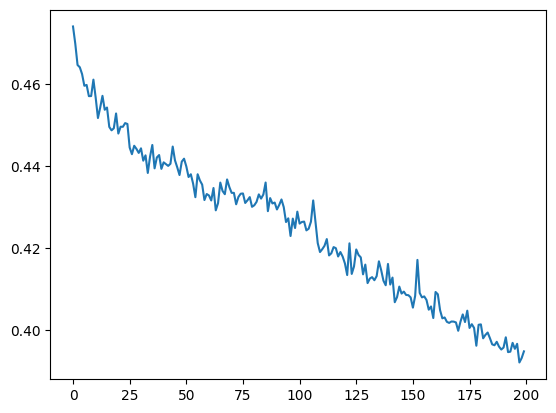

In [3]:
model.optimize_weights(X_train, y_train, batch_size=1024, background_batch_size=512)

In [4]:
X_test_proc = preprocess_data(X_test, '../data/transform_data_pipeline.pkl')

In [12]:
y_proba = model.predict_batch(X_test_proc, batch_size=1024, background_batch_size=512)[:, 1]

Predicting:   0%|          | 0/4 [00:00<?, ?it/s]

Predicting: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]


In [13]:
#y_proba = model.predict(X_test_proc)

thresholds = np.linspace(0, 1, 100)

beta = 2

max_f1_vals = []
max_f1_args = []

f1_scores = []

y_true = np.array([1 if label == 0 else 0 for label in y_test])
for thr in thresholds:
    y_pred = (np.array([1 - score for score in y_proba]) >= 1 - thr).astype(int)
    f1 = fbeta_score(y_true, y_pred, beta=beta)
    f1_scores.append(f1)

f1_scores = np.array(f1_scores)
max_f1 = f1_scores.max()
arg_f1 = f1_scores.argmax()

print(f'max F2 = {max_f1:.3f}, threshold = {arg_f1 / 100}')

#max F2 = 0.637, threshold = 0.98


max F2 = 0.570, threshold = 0.99
